In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mtcars.csv')
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
"""
mpg: 마일 당 갤런(Gallon)으로 자동차의 연비를 나타내는 변수.
cyl: 엔진 실린더 수를 나타내는 변수.
disp: 엔진 배기량(Displacement)을 나타내는 변수.
hp: 최대 출력 마력(Horsepower)을 나타내는 변수.
drat: 후륜 비율을 나타내는 변수.
wt: 자동차의 무게(Weight)를 나타내는 변수.
qsec: 1/4 마일 동안 가속 시간을 나타내는 변수.
vs: V/S 엔진 유형 (V 엔진: 0, S 엔진: 1).
am: 변속기 유형 (자동: 0, 수동: 1).
gear: 전진 기어 수를 나타내는 변수.
carb: 기화기 수를 나타내는 변수.
"""

In [4]:
df = df.drop(labels='Unnamed: 0', axis=1)
corr = df.corr('pearson')
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


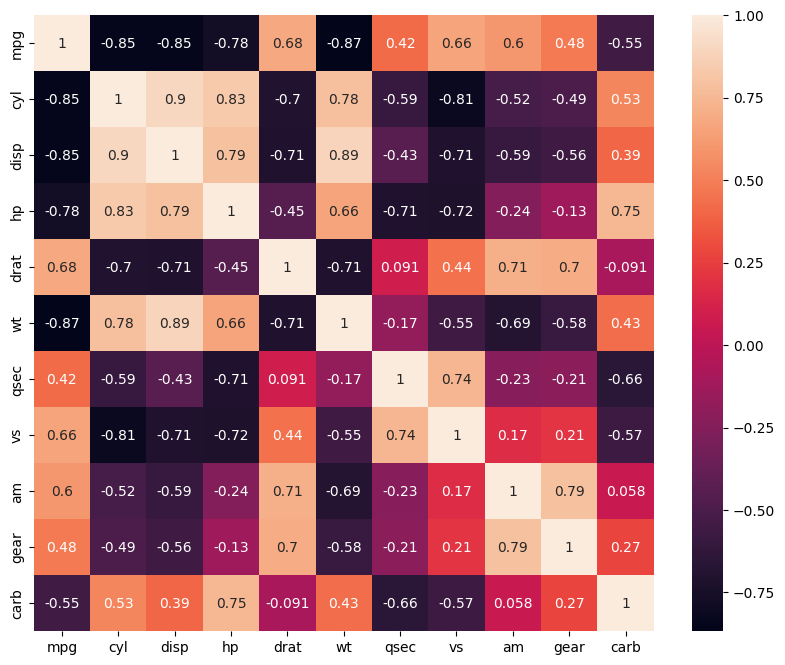

In [15]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.heatmap(corr, annot=True)

In [5]:
s = corr.unstack()
corr_df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_df.style.background_gradient(cmap='viridis')
# corr_df

In [36]:

## 양의 상관관계 최대값 추출
res = []
for i in corr.columns:
    li = corr[i].drop(i).sort_values()
    var, val = li.idxmax(), li.max()
    res.append({'Var': i, 'Max_Corr': var, 'Corr': val})

## 독립 변수 상관관계 중복 제거
final = pd.DataFrame(res).sort_values(by='Corr', ascending=False).reset_index(drop=True)
final['Pair'] = final.apply(lambda row: tuple(sorted([row['Var'], row['Max_Corr']])), axis=1)
final_unique = final.drop_duplicates(subset=['Pair']).drop('Pair', axis=1)

final_unique

,Var,Max_Corr,Corr
0,cyl,disp,0.902033
2,wt,disp,0.887980
3,hp,cyl,0.832447
4,am,gear,0.794059
6,carb,hp,0.749812
7,qsec,vs,0.744535
9,drat,am,0.712711
10,mpg,drat,0.681172


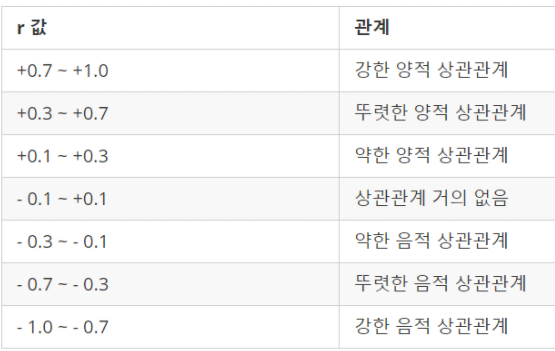

In [30]:
# 다중공선성 제거: 'disp' 변수 제거
df_model = df.drop(columns=['disp', 'Unnamed: 0'])

# 독립변수와 종속변수 설정
x = df_model.drop(columns=['mpg'])
y = df_model['mpg']

# 회귀 모델 학습
model = LinearRegression()
model.fit(x, y)

# 모든 데이터에 대해 예측
y_pred = model.predict(x)


results = pd.DataFrame({
    '차종': df['Unnamed: 0'],
    '기존 연비': y,
    '예측 연비': y_pred.round(1)
})

results['diff'] = abs(results['기존 연비'] - results['예측 연비'])
results = results.sort_values(by='diff', ascending=True).drop('diff', axis=1).reset_index(drop=True)

results

,차종,기존 연비,예측 연비
0,Ferrari Dino,19.7,19.8
1,Camaro Z28,13.3,13.5
2,Merc 280,19.2,19.0
3,Lincoln Continental,10.4,10.7
4,Porsche 914-2,26.0,26.3
5,Duster 360,14.3,14.0
6,Hornet 4 Drive,21.4,20.8
7,Cadillac Fleetwood,10.4,11.3
8,Fiat X1-9,27.3,28.4
9,Honda Civic,30.4,29.3
